In [1]:
import sys
sys.path.append('../code')
import sampler
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import numpy as np

# Simulation

In [2]:
mu = 1
alpha = 1
beta = 1.1
T = 200

In [3]:
events = sampler.generate_events(base_rate=mu,alpha=alpha,beta=beta,maxtime=T)

In [4]:
times = np.array([e[0] for e in events])

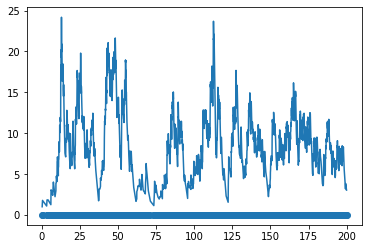

In [5]:
plt.scatter([e[0] for e in events],[0 for _ in events])
plt.plot([e[0] for e in events],[e[1] for e in events])

Text(0, 0.5, 'Intensity')

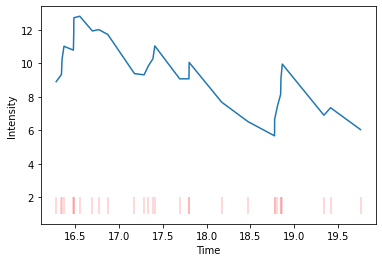

In [6]:
plt.vlines([e[0] for e in events[100:130]],1,2,color='red',alpha=0.2)
plt.plot([e[0] for e in events[100:130]],[e[1] for e in events[100:130]])
plt.xlabel('Time')
plt.ylabel('Intensity')

# EM

$$\lambda_0(t)=\mu, \lambda_j(t) = p(t-t_j)^{-1}$$

$$Q\left(\hat\theta\right) = \mathbb E[\log \mathcal L(t,b;\hat\theta)]=-\int_0^T \lambda(t)dt + \sum_{i=1}^n \mathbb E[\log\left(\lambda_{b_i}(t_i)\right)]=-\int_0^T \lambda(t)dt + \sum_{i=1}^n \sum_{j=0}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\log\left(\lambda_{j}(t_i)\right)$$

$$=-\mu T - \sum_{j=1}^n \int_{t_j}^T p(t-t_j)^{-1} dt + \sum_{i=1}^n \left(\mathbb P(b_i=0\vert t,\hat\theta)\log(\mu)-\sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\log(p(t_i-t_j))\right)$$

$$Q_{p_k}(\hat\theta)= \sum_{j=1}^n \int_{t_j}^T (t-t_j)^k p(t-t_j)^{-2} dt - \sum_{i=1}^n \sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)(t_i-t_j)^k p(t_i-t_j)^{-1}$$

$$\sum_{i=1}^n \left(p(t_i-t_j)\int_{t_i}^T(t-t_i)^k p(t-t_i)^{-2}dt - \sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)(t_i-t_j)^k\right)=0$$

$$\theta=\left[\begin{matrix}\mu\\\alpha\\\beta\\\tau\end{matrix}\right]$$

$$\lambda_0(t)=\mu, \lambda_j(t) = \alpha(\tau+t-t_j)^\beta$$

$$Q\left(\hat\theta\right) = \mathbb E[\log \mathcal L(t,b;\hat\theta)]=-\int_0^T \lambda(t)dt + \sum_{i=1}^n \mathbb E[\log\left(\lambda_{b_i}(t_i)\right)]=-\int_0^T \lambda(t)dt + \sum_{i=1}^n \sum_{j=0}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\log\left(\lambda_{j}(t_i)\right)$$

$$=-\mu T - \alpha \sum_{j=1}^n \int_{t_j}^T (\tau+t-t_j)^\beta dt + \sum_{i=1}^n \left(\mathbb P(b_i=0\vert t,\hat\theta)\log(\mu)+\sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\left(\log\left(\alpha\right)+\beta \log(\tau+t_i-t_j)\right)\right)$$

$$=-\mu T - \frac{\alpha}{\beta+1} \sum_{j=1}^n \left((\tau+T-t_j)^{\beta+1}-\tau^{\beta+1}\right) + \sum_{i=1}^n \left(\mathbb P(b_i=0\vert t,\hat\theta)\log(\mu)+\sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\left(\log\left(\alpha\right)+\beta \log(\tau+t_i-t_j)\right)\right)$$

$$\lambda(t) = \mu + \sum_{t_j<t}\alpha \exp(\beta (t_j-t))$$

$$\theta=\left[\begin{matrix}\mu\\\alpha\\\beta\end{matrix}\right]$$

$$\phi(t) = \sum_{t_i< t} \alpha \exp(\beta (t_i-t))$$

$$Q\left(\hat\theta\right) = \mathbb E[\log \mathcal L(t,b;\hat\theta)]=-\int_0^T \lambda(t)dt + \sum_{i=1}^n \mathbb E[\log\left(\lambda_{b_i}(t_i)\right)]=-\int_0^T \lambda(t)dt + \sum_{i=1}^n \sum_{j=0}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\log\left(\lambda_{j}(t_i)\right)$$$$=-\mu T - \sum_{j=1}^n \int_{t_j}^T \alpha\exp\left(\beta(t_j-t)\right)dt + \sum_{i=1}^n \sum_{j=0}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\log\left(\lambda_{j}(t_i)\right)$$$$=-\mu T + \frac{\alpha}{\beta}\sum_{j=1}^n \left(\exp\left(\beta(t_j-T)\right)-1\right) + \sum_{i=1}^n \sum_{j=0}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)\log\left(\lambda_{j}(t_i)\right)$$

$$Q_\mu\left(\hat\theta\right) =-T + \frac{1}{\mu}\sum_{i=1}^n \mathbb P(b_i=0\vert t,\hat\theta)=0\implies \mu=\frac{1}{T}\sum_{i=1}^n \mathbb P(b_i=0\vert t,\hat\theta)$$

$$Q_\alpha(\hat\theta)=-\sum_{j=1}^n\int_{t_j}^T\exp(\beta(t_j-t))dt+\frac{1}{\alpha}\sum_{i=2}^n \sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)=0\implies \alpha=\frac{\sum_{i=2}^n \sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)}{\sum_{j=1}^n\int_{t_j}^T\exp(\beta(t_j-t))dt}=\frac{\beta\sum_{i=2}^n \sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)}{\sum_{j=1}^n1-\exp(\beta(t_j-T))}$$

$$Q_\beta(\hat\theta)=-\sum_{j=1}^n\int_{t_j}^T(t_j-t)\alpha\exp(\beta(t_j-t))dt+\sum_{i=2}^n \sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)(t_j-t_i)=\alpha\sum_{j=1}^n\frac{1-(\beta(T-t_j)+1)\exp(\beta(t_j-T))}{\beta^2}+\sum_{i=2}^n \sum_{j=1}^{i-1}\mathbb P(b_i=j\vert t,\hat\theta)(t_j-t_i)$$

In [116]:
n = len(events)

print("E")
#E step
branching_matrix = np.array([[0 for _ in range(len(events)+1)]]+[[mu]+[alpha*np.exp(beta*(e2[0]-e[0])) if e2[0]<e[0] else 0 for e2 in events] for e in events])
c = branching_matrix.sum(axis=1)
c[0] = 1
branching_matrix /= c.reshape(-1,1)

E


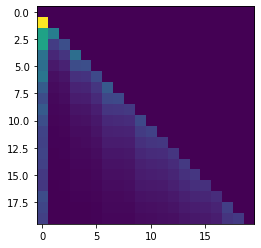

In [117]:
plt.imshow(branching_matrix[:20,:20])

In [118]:
branching_matrix = np.array([[0 for _ in range(len(events)+1)]]+[[mu]+[alpha*np.exp(beta*(e2[0]-e[0])) if e2[0]<e[0] else 0 for e2 in events] for e in events])
c = branching_matrix.sum(axis=1)
c[0] = 1
branching_matrix /= c.reshape(-1,1)

logbeta = np.log(beta)
#M step
@jax.jit
def q(logbeta):
    beta = jnp.exp(logbeta)
    alpha = beta * branching_matrix[1:,1:].sum() / (1-jnp.exp(beta*(times-T))).sum()
    mu = (1/T) * branching_matrix[1:,0].sum()
    sum_residuals = mu*T + (alpha/beta)*(1-jnp.exp(beta*(times-T))).sum()
    #assert np.allclose([branching_matrix[i,0]+sum([branching_matrix[i,j] for j in range(1,i)]) for i in range(1,n+1)],1)
    sum_expected_event_ll = (branching_matrix[1:n+1,0]*np.log(mu)).sum() + (branching_matrix[1:,1:]*(jnp.log(alpha)+beta*(times-times.reshape(-1,1)))).sum()
    return sum_expected_event_ll - sum_residuals

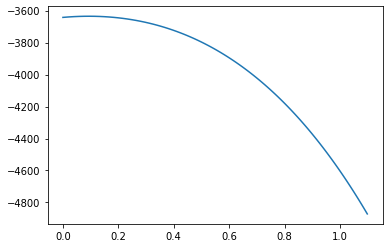

In [119]:
x = np.log(np.linspace(1,3,100))
plt.plot(x, [q(x_) for x_ in x])
del x

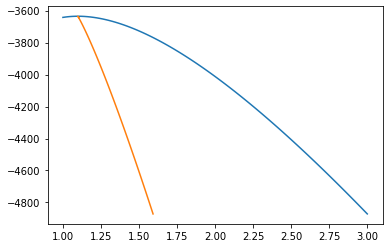

In [120]:
x = np.linspace(1,3,100)
plt.plot(x, [q(np.log(x_)) for x_ in x])
plt.plot([np.exp(x_-jax.grad(q)(x_)/jax.hessian(q)(x_)) for x_ in np.log(x)], [q(x_) for x_ in np.log(x)])
del x

In [14]:
def em(events, T, theta_guess = [0.5,0.5,0.5], steps=1000, learning_rate=0.01):
    mu,alpha,beta = theta_guess
    n = len(events)
    times = np.array([e[0] for e in events])
    
    momentum = 0
    loglikelihood_opt = None
    theta_opt = None
    for _ in range(steps):
        print("E")
        #E step
        branching_matrix = np.array([[0 for _ in range(len(events)+1)]]+[[mu]+[alpha*np.exp(beta*(e2[0]-e[0])) if e2[0]<e[0] else 0 for e2 in events] for e in events])
        print("Normalise")
        c = branching_matrix.sum(axis=1)
        c[0] = 1
        branching_matrix /= c.reshape(-1,1)
        
        plt.imshow(branching_matrix[:30,:30])
        plt.show()
        
        logbeta = np.log(beta)
        
        print("M")
        #M step
        @jax.jit
        def q(logbeta):
            beta = jnp.exp(logbeta)
            alpha = beta * branching_matrix[1:,1:].sum() / (1-jnp.exp(beta*(times-T))).sum()
            mu = (1/T) * branching_matrix[1:,0].sum()
            sum_residuals = mu*T + (alpha/beta)*(1-jnp.exp(beta*(times-T))).sum()
            #assert np.allclose([branching_matrix[i,0]+sum([branching_matrix[i,j] for j in range(1,i)]) for i in range(1,n+1)],1)
            sum_expected_event_ll = (branching_matrix[1:n+1,0]*np.log(mu)).sum() + (branching_matrix[1:,1:]*(jnp.log(alpha)+beta*(times-times.reshape(-1,1)))).sum()
            return sum_expected_event_ll - sum_residuals
        
        print("q")
        loglikelihood = q(logbeta)
#         gradient_step = np.array(jax.grad(q)(logbeta))
#         step_size = learning_rate * np.linalg.norm(gradient_step)**-2
#         logbeta += step_size * gradient_step

        print("Newton Step")
        newton_step = -jax.grad(q)(logbeta) / jax.hessian(q)(logbeta)
        logbeta += newton_step
        
        print("Beta,mu,alpha")
        beta = np.exp(logbeta)
        mu = (1/T) * branching_matrix[1:,0].sum()
        alpha = beta * branching_matrix[1:,1:].sum() / (1-jnp.exp(beta*(times-T))).sum()
        
        print("Update loglikelihood_opt")
        if loglikelihood_opt is None or loglikelihood > loglikelihood_opt:
            theta_opt = mu,alpha,beta
            loglikelihood_opt = loglikelihood
        
        #print(f'{loglikelihood=}\n{mu,alpha,beta=}\n{gradient_step*step_size=}\n')
        print(f'{loglikelihood=}\n{mu,alpha,beta=}\n{newton_step=}\n')
        
        """
        newton_step = -np.linalg.solve(jax.hessian(q)([logalpha,beta]), jax.grad(q)([logalpha,beta]))
        gradient_step = np.array(jax.grad(q)([logalpha,beta]))
        print(f'{logalpha,beta=}, {newton_step=}, {gradient_step=}')
        if all((newton_step*gradient_step)>0):
            print('newton')
            logalpha,beta = np.array([logalpha,beta]) + newton_step
        else:
            print('gradient')
            logalpha,beta = np.array([logalpha,beta]) + step_size * gradient_step
        """
        
        
    return theta_opt

In [10]:
mu,alpha,beta

(1, 1, 1.1)

E
Normalise


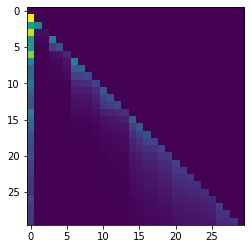

M
q
Newton Step
Beta,mu,alpha
Update loglikelihood_opt
loglikelihood=Array(-3139.2756, dtype=float32)
mu,alpha,beta=(0.9923247001107299, Array(0.97055316, dtype=float32), 1.1016262)
newton_step=Array(0.00147724, dtype=float32)

E


KeyboardInterrupt: 

In [15]:
em(events,T,theta_guess=[1,1,1.1])

In [175]:
def gradient_steps(events, T, theta_guess = np.array([0.5,0.5,0.5]), steps=1000, learning_rate=100):
    theta = theta_guess
    n = len(events)
    
    loglikelihood_opt = None
    theta_opt = None
    for _ in range(steps):
        logtheta = np.log(theta)
        #M step
        @jax.jit
        def q(logtheta):
            mu, alpha, beta = jnp.exp(logtheta)
            sum_residuals = mu*T + (alpha/beta)*(1-jnp.exp(beta*(times-T))).sum()
            sum_event_ll = jnp.log(mu+alpha*jnp.exp(beta*(times-times.reshape(-1,1)))).sum()
            return sum_event_ll - sum_residuals
        
        loglikelihood = q(logtheta)
        gradient_step = np.array(jax.grad(q)(logtheta))
        print(gradient_step)
        step_size = learning_rate * np.linalg.norm(gradient_step)**-2
        logtheta += step_size * gradient_step
        
        theta = np.exp(logtheta)
        
        if loglikelihood_opt is None or loglikelihood > loglikelihood_opt:
            theta_opt = theta
            loglikelihood_opt = loglikelihood
        
        #print(f'{loglikelihood=}\n{mu,alpha,beta=}\n{gradient_step*step_size=}\n')
        print(f'{loglikelihood=}\n{theta=}\n{step_size * gradient_step=}\n')
        
    return theta_opt

In [ ]:
gradient_steps(events,T,theta_guess = [0.5,0.5,0.5])

In [166]:
gradient_steps(events,T,theta_guess = [1,1,1.1])

loglikelihood=Array(-1867.9996, dtype=float32)
theta=array([1.00001368, 1.00001368, 1.10000001])
step_size * gradient_step=array([1.3683576e-05, 1.3677852e-05, 6.3930514e-09], dtype=float32)

loglikelihood=Array(-1754.776, dtype=float32)
theta=array([1.00002737, 1.00002736, 1.10000001])
step_size * gradient_step=array([1.3683576e-05, 1.3677852e-05, 6.3931402e-09], dtype=float32)

loglikelihood=Array(-1674.49, dtype=float32)
theta=array([1.00004105, 1.00004103, 1.10000002])
step_size * gradient_step=array([1.3683576e-05, 1.3677852e-05, 6.3932277e-09], dtype=float32)

loglikelihood=Array(-1592.5789, dtype=float32)
theta=array([1.00005474, 1.00005471, 1.10000003])
step_size * gradient_step=array([1.3683576e-05, 1.3677851e-05, 6.3933157e-09], dtype=float32)

loglikelihood=Array(-1472.2928, dtype=float32)
theta=array([1.00006842, 1.00006839, 1.10000004])
step_size * gradient_step=array([1.3683576e-05, 1.3677852e-05, 6.3934040e-09], dtype=float32)

loglikelihood=Array(-1373.3192, dtype=float

loglikelihood=Array(2387.8657, dtype=float32)
theta=array([1.00060226, 1.00060201, 1.10000031])
step_size * gradient_step=array([1.36835824e-05, 1.36778535e-05, 6.39684528e-09], dtype=float32)

loglikelihood=Array(2487.6519, dtype=float32)
theta=array([1.00061595, 1.00061569, 1.10000032])
step_size * gradient_step=array([1.36835824e-05, 1.36778535e-05, 6.39693321e-09], dtype=float32)

loglikelihood=Array(2550.4377, dtype=float32)
theta=array([1.00062964, 1.00062938, 1.10000032])
step_size * gradient_step=array([1.36835815e-05, 1.36778535e-05, 6.39702202e-09], dtype=float32)

loglikelihood=Array(2644.1616, dtype=float32)
theta=array([1.00064334, 1.00064307, 1.10000033])
step_size * gradient_step=array([1.36835815e-05, 1.36778535e-05, 6.39710951e-09], dtype=float32)

loglikelihood=Array(2723.8853, dtype=float32)
theta=array([1.00065703, 1.00065675, 1.10000034])
step_size * gradient_step=array([1.36835815e-05, 1.36778526e-05, 6.39719699e-09], dtype=float32)

loglikelihood=Array(2823.9214,

loglikelihood=Array(6641.668, dtype=float32)
theta=array([1.00119118, 1.00119068, 1.10000061])
step_size * gradient_step=array([1.3683582e-05, 1.3677852e-05, 6.4006374e-09], dtype=float32)

loglikelihood=Array(6720.3916, dtype=float32)
theta=array([1.00120488, 1.00120438, 1.10000062])
step_size * gradient_step=array([1.3683582e-05, 1.3677852e-05, 6.4007262e-09], dtype=float32)

loglikelihood=Array(6836.115, dtype=float32)
theta=array([1.00121858, 1.00121807, 1.10000063])
step_size * gradient_step=array([1.3683582e-05, 1.3677852e-05, 6.4008145e-09], dtype=float32)

loglikelihood=Array(6912.0264, dtype=float32)
theta=array([1.00123228, 1.00123176, 1.10000063])
step_size * gradient_step=array([1.3683582e-05, 1.3677852e-05, 6.4009025e-09], dtype=float32)

loglikelihood=Array(7022.375, dtype=float32)
theta=array([1.00124598, 1.00124546, 1.10000064])
step_size * gradient_step=array([1.3683582e-05, 1.3677852e-05, 6.4009913e-09], dtype=float32)

loglikelihood=Array(7128.4736, dtype=float32)
th

loglikelihood=Array(10950.72, dtype=float32)
theta=array([1.00178045, 1.0017797 , 1.10000092])
step_size * gradient_step=array([1.3683588e-05, 1.3677854e-05, 6.4044356e-09], dtype=float32)

loglikelihood=Array(11039.068, dtype=float32)
theta=array([1.00179416, 1.0017934 , 1.10000092])
step_size * gradient_step=array([1.3683589e-05, 1.3677854e-05, 6.4045236e-09], dtype=float32)

loglikelihood=Array(11133.1045, dtype=float32)
theta=array([1.00180787, 1.00180711, 1.10000093])
step_size * gradient_step=array([1.36835888e-05, 1.36778535e-05, 6.40461240e-09], dtype=float32)

loglikelihood=Array(11225.141, dtype=float32)
theta=array([1.00182157, 1.00182081, 1.10000094])
step_size * gradient_step=array([1.3683588e-05, 1.3677854e-05, 6.4047003e-09], dtype=float32)

loglikelihood=Array(11324.552, dtype=float32)
theta=array([1.00183528, 1.00183451, 1.10000094])
step_size * gradient_step=array([1.3683588e-05, 1.3677854e-05, 6.4047891e-09], dtype=float32)

loglikelihood=Array(11402.838, dtype=float

loglikelihood=Array(15257.2705, dtype=float32)
theta=array([1.00237006, 1.00236907, 1.10000122])
step_size * gradient_step=array([1.3683592e-05, 1.3677855e-05, 6.4082344e-09], dtype=float32)

loglikelihood=Array(15367.494, dtype=float32)
theta=array([1.00238378, 1.00238278, 1.10000123])
step_size * gradient_step=array([1.3683592e-05, 1.3677854e-05, 6.4083228e-09], dtype=float32)

loglikelihood=Array(15463.343, dtype=float32)
theta=array([1.0023975 , 1.00239649, 1.10000123])
step_size * gradient_step=array([1.3683592e-05, 1.3677855e-05, 6.4084111e-09], dtype=float32)

loglikelihood=Array(15564.066, dtype=float32)
theta=array([1.00241121, 1.0024102 , 1.10000124])
step_size * gradient_step=array([1.3683592e-05, 1.3677854e-05, 6.4085000e-09], dtype=float32)

loglikelihood=Array(15663.04, dtype=float32)
theta=array([1.00242493, 1.00242391, 1.10000125])
step_size * gradient_step=array([1.3683592e-05, 1.3677854e-05, 6.4085879e-09], dtype=float32)

loglikelihood=Array(15764.701, dtype=float32)

loglikelihood=Array(19593.32, dtype=float32)
theta=array([1.00296003, 1.00295878, 1.10000152])
step_size * gradient_step=array([1.3683596e-05, 1.3677854e-05, 6.4120353e-09], dtype=float32)

loglikelihood=Array(19682.107, dtype=float32)
theta=array([1.00297375, 1.0029725 , 1.10000153])
step_size * gradient_step=array([1.3683595e-05, 1.3677854e-05, 6.4121233e-09], dtype=float32)

loglikelihood=Array(19773.08, dtype=float32)
theta=array([1.00298748, 1.00298622, 1.10000154])
step_size * gradient_step=array([1.3683597e-05, 1.3677855e-05, 6.4122134e-09], dtype=float32)

loglikelihood=Array(19862.867, dtype=float32)
theta=array([1.0030012 , 1.00299994, 1.10000154])
step_size * gradient_step=array([1.36835961e-05, 1.36778535e-05, 6.41230047e-09], dtype=float32)

loglikelihood=Array(19979.902, dtype=float32)
theta=array([1.00301492, 1.00301366, 1.10000155])
step_size * gradient_step=array([1.3683596e-05, 1.3677854e-05, 6.4123888e-09], dtype=float32)

loglikelihood=Array(20069.377, dtype=float32

loglikelihood=Array(23879.934, dtype=float32)
theta=array([1.00355034, 1.00354885, 1.10000182])
step_size * gradient_step=array([1.3683597e-05, 1.3677853e-05, 6.4158381e-09], dtype=float32)

loglikelihood=Array(23973.719, dtype=float32)
theta=array([1.00356407, 1.00356257, 1.10000183])
step_size * gradient_step=array([1.3683597e-05, 1.3677853e-05, 6.4159260e-09], dtype=float32)

loglikelihood=Array(24081.756, dtype=float32)
theta=array([1.0035778 , 1.0035763 , 1.10000184])
step_size * gradient_step=array([1.3683597e-05, 1.3677853e-05, 6.4160148e-09], dtype=float32)

loglikelihood=Array(24205.354, dtype=float32)
theta=array([1.00359153, 1.00359003, 1.10000185])
step_size * gradient_step=array([1.3683597e-05, 1.3677853e-05, 6.4161028e-09], dtype=float32)

loglikelihood=Array(24308.516, dtype=float32)
theta=array([1.00360527, 1.00360375, 1.10000185])
step_size * gradient_step=array([1.3683600e-05, 1.3677854e-05, 6.4161929e-09], dtype=float32)

loglikelihood=Array(24381.738, dtype=float32)

loglikelihood=Array(28162.982, dtype=float32)
theta=array([1.00414099, 1.00413925, 1.10000213])
step_size * gradient_step=array([1.3683603e-05, 1.3677854e-05, 6.4196439e-09], dtype=float32)

loglikelihood=Array(28263.58, dtype=float32)
theta=array([1.00415473, 1.00415299, 1.10000214])
step_size * gradient_step=array([1.3683602e-05, 1.3677855e-05, 6.4197327e-09], dtype=float32)

loglikelihood=Array(28365.43, dtype=float32)
theta=array([1.00416848, 1.00416672, 1.10000214])
step_size * gradient_step=array([1.3683603e-05, 1.3677855e-05, 6.4198216e-09], dtype=float32)

loglikelihood=Array(28452.84, dtype=float32)
theta=array([1.00418222, 1.00418046, 1.10000215])
step_size * gradient_step=array([1.3683603e-05, 1.3677854e-05, 6.4199099e-09], dtype=float32)

loglikelihood=Array(28563.44, dtype=float32)
theta=array([1.00419596, 1.00419419, 1.10000216])
step_size * gradient_step=array([1.3683603e-05, 1.3677856e-05, 6.4199988e-09], dtype=float32)

loglikelihood=Array(28667.037, dtype=float32)
the

loglikelihood=Array(32438.592, dtype=float32)
theta=array([1.004732  , 1.00473001, 1.10000243])
step_size * gradient_step=array([1.3683607e-05, 1.3677856e-05, 6.4234524e-09], dtype=float32)

loglikelihood=Array(32548.316, dtype=float32)
theta=array([1.00474575, 1.00474375, 1.10000244])
step_size * gradient_step=array([1.3683607e-05, 1.3677855e-05, 6.4235404e-09], dtype=float32)

loglikelihood=Array(32637.852, dtype=float32)
theta=array([1.0047595 , 1.0047575 , 1.10000245])
step_size * gradient_step=array([1.3683607e-05, 1.3677856e-05, 6.4236296e-09], dtype=float32)

loglikelihood=Array(32731.826, dtype=float32)
theta=array([1.00477325, 1.00477124, 1.10000245])
step_size * gradient_step=array([1.3683607e-05, 1.3677855e-05, 6.4237184e-09], dtype=float32)

loglikelihood=Array(32813.926, dtype=float32)
theta=array([1.00478699, 1.00478498, 1.10000246])
step_size * gradient_step=array([1.3683607e-05, 1.3677855e-05, 6.4238064e-09], dtype=float32)

loglikelihood=Array(32925.773, dtype=float32)

loglikelihood=Array(36676.83, dtype=float32)
theta=array([1.00532335, 1.00532111, 1.10000274])
step_size * gradient_step=array([1.36836115e-05, 1.36778563e-05, 6.42726228e-09], dtype=float32)

loglikelihood=Array(36805.363, dtype=float32)
theta=array([1.00533711, 1.00533487, 1.10000274])
step_size * gradient_step=array([1.36836115e-05, 1.36778563e-05, 6.42735198e-09], dtype=float32)

loglikelihood=Array(36896.4, dtype=float32)
theta=array([1.00535087, 1.00534862, 1.10000275])
step_size * gradient_step=array([1.3683610e-05, 1.3677855e-05, 6.4274390e-09], dtype=float32)

loglikelihood=Array(37030.125, dtype=float32)
theta=array([1.00536462, 1.00536237, 1.10000276])
step_size * gradient_step=array([1.3683611e-05, 1.3677856e-05, 6.4275283e-09], dtype=float32)

loglikelihood=Array(37109.848, dtype=float32)
theta=array([1.00537838, 1.00537612, 1.10000276])
step_size * gradient_step=array([1.3683611e-05, 1.3677856e-05, 6.4276171e-09], dtype=float32)

loglikelihood=Array(37206.508, dtype=float

loglikelihood=Array(41026.688, dtype=float32)
theta=array([1.00591505, 1.00591257, 1.10000304])
step_size * gradient_step=array([1.3683614e-05, 1.3677855e-05, 6.4310752e-09], dtype=float32)

loglikelihood=Array(41153.348, dtype=float32)
theta=array([1.00592882, 1.00592632, 1.10000305])
step_size * gradient_step=array([1.3683614e-05, 1.3677855e-05, 6.4311640e-09], dtype=float32)

loglikelihood=Array(41251.633, dtype=float32)
theta=array([1.00594258, 1.00594008, 1.10000305])
step_size * gradient_step=array([1.3683614e-05, 1.3677855e-05, 6.4312533e-09], dtype=float32)

loglikelihood=Array(41380.547, dtype=float32)
theta=array([1.00595635, 1.00595384, 1.10000306])
step_size * gradient_step=array([1.3683614e-05, 1.3677855e-05, 6.4313412e-09], dtype=float32)

loglikelihood=Array(41488.52, dtype=float32)
theta=array([1.00597011, 1.0059676 , 1.10000307])
step_size * gradient_step=array([1.3683614e-05, 1.3677855e-05, 6.4314296e-09], dtype=float32)

loglikelihood=Array(41625.555, dtype=float32)


loglikelihood=Array(45407.61, dtype=float32)
theta=array([1.00650711, 1.00650437, 1.10000334])
step_size * gradient_step=array([1.3683619e-05, 1.3677857e-05, 6.4348895e-09], dtype=float32)

loglikelihood=Array(45510.332, dtype=float32)
theta=array([1.00652088, 1.00651813, 1.10000335])
step_size * gradient_step=array([1.3683619e-05, 1.3677857e-05, 6.4349792e-09], dtype=float32)

loglikelihood=Array(45641.43, dtype=float32)
theta=array([1.00653465, 1.0065319 , 1.10000336])
step_size * gradient_step=array([1.3683619e-05, 1.3677857e-05, 6.4350667e-09], dtype=float32)

loglikelihood=Array(45759.09, dtype=float32)
theta=array([1.00654842, 1.00654567, 1.10000337])
step_size * gradient_step=array([1.3683619e-05, 1.3677857e-05, 6.4351560e-09], dtype=float32)

loglikelihood=Array(45864.254, dtype=float32)
theta=array([1.0065622 , 1.00655943, 1.10000337])
step_size * gradient_step=array([1.3683619e-05, 1.3677856e-05, 6.4352443e-09], dtype=float32)

loglikelihood=Array(45953.85, dtype=float32)
the

loglikelihood=Array(49734.777, dtype=float32)
theta=array([1.0070995 , 1.00709651, 1.10000365])
step_size * gradient_step=array([1.3683624e-05, 1.3677859e-05, 6.4387078e-09], dtype=float32)

loglikelihood=Array(49840.38, dtype=float32)
theta=array([1.00711328, 1.00711029, 1.10000366])
step_size * gradient_step=array([1.3683624e-05, 1.3677859e-05, 6.4387975e-09], dtype=float32)

loglikelihood=Array(49925.54, dtype=float32)
theta=array([1.00712707, 1.00712406, 1.10000366])
step_size * gradient_step=array([1.3683622e-05, 1.3677856e-05, 6.4388828e-09], dtype=float32)

loglikelihood=Array(50012.637, dtype=float32)
theta=array([1.00714085, 1.00713784, 1.10000367])
step_size * gradient_step=array([1.3683624e-05, 1.3677859e-05, 6.4389734e-09], dtype=float32)

loglikelihood=Array(50104.86, dtype=float32)
theta=array([1.00715463, 1.00715161, 1.10000368])
step_size * gradient_step=array([1.3683625e-05, 1.3677858e-05, 6.4390626e-09], dtype=float32)

loglikelihood=Array(50195.395, dtype=float32)
th

loglikelihood=Array(54039.887, dtype=float32)
theta=array([1.00769225, 1.00768901, 1.10000395])
step_size * gradient_step=array([1.3683625e-05, 1.3677857e-05, 6.4425247e-09], dtype=float32)

loglikelihood=Array(54138.797, dtype=float32)
theta=array([1.00770604, 1.00770279, 1.10000396])
step_size * gradient_step=array([1.3683625e-05, 1.3677857e-05, 6.4426144e-09], dtype=float32)

loglikelihood=Array(54240.332, dtype=float32)
theta=array([1.00771983, 1.00771657, 1.10000397])
step_size * gradient_step=array([1.3683624e-05, 1.3677857e-05, 6.4427033e-09], dtype=float32)

loglikelihood=Array(54349.56, dtype=float32)
theta=array([1.00773362, 1.00773036, 1.10000397])
step_size * gradient_step=array([1.3683629e-05, 1.3677859e-05, 6.4427930e-09], dtype=float32)

loglikelihood=Array(54449.72, dtype=float32)
theta=array([1.00774741, 1.00774414, 1.10000398])
step_size * gradient_step=array([1.3683629e-05, 1.3677859e-05, 6.4428822e-09], dtype=float32)

loglikelihood=Array(54551.004, dtype=float32)
t

2024-03-12 12:36:41.467788: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 4m3.539053s

********************************
[Compiling module jit_q] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


loglikelihood=Array(58186.832, dtype=float32)
theta=array([1.00827155, 1.00826806, 1.10000425])
step_size * gradient_step=array([1.3683631e-05, 1.3677860e-05, 6.4462595e-09], dtype=float32)

loglikelihood=Array(58305.867, dtype=float32)
theta=array([1.00828535, 1.00828185, 1.10000426])
step_size * gradient_step=array([1.3683631e-05, 1.3677860e-05, 6.4463488e-09], dtype=float32)

loglikelihood=Array(58392.215, dtype=float32)
theta=array([1.00829914, 1.00829564, 1.10000427])
step_size * gradient_step=array([1.3683631e-05, 1.3677860e-05, 6.4464367e-09], dtype=float32)

loglikelihood=Array(58480.13, dtype=float32)
theta=array([1.00831294, 1.00830944, 1.10000427])
step_size * gradient_step=array([1.3683631e-05, 1.3677860e-05, 6.4465255e-09], dtype=float32)

loglikelihood=Array(58547.29, dtype=float32)
theta=array([1.00832674, 1.00832323, 1.10000428])
step_size * gradient_step=array([1.3683631e-05, 1.3677860e-05, 6.4466139e-09], dtype=float32)

loglikelihood=Array(58634.51, dtype=float32)
th

loglikelihood=Array(62452., dtype=float32)
theta=array([1.00886499, 1.00886125, 1.10000456])
step_size * gradient_step=array([1.36836325e-05, 1.36778581e-05, 6.45008136e-09], dtype=float32)

loglikelihood=Array(62530.473, dtype=float32)
theta=array([1.00887879, 1.00887505, 1.10000456])
step_size * gradient_step=array([1.3683632e-05, 1.3677858e-05, 6.4501706e-09], dtype=float32)

loglikelihood=Array(62645.637, dtype=float32)
theta=array([1.0088926 , 1.00888885, 1.10000457])
step_size * gradient_step=array([1.36836325e-05, 1.36778581e-05, 6.45025855e-09], dtype=float32)

loglikelihood=Array(62729.61, dtype=float32)
theta=array([1.0089064 , 1.00890265, 1.10000458])
step_size * gradient_step=array([1.36836325e-05, 1.36778581e-05, 6.45034781e-09], dtype=float32)

loglikelihood=Array(62799.02, dtype=float32)
theta=array([1.00892021, 1.00891644, 1.10000458])
step_size * gradient_step=array([1.36836325e-05, 1.36778563e-05, 6.45043707e-09], dtype=float32)

loglikelihood=Array(62906.93, dtype=fl

loglikelihood=Array(66732.484, dtype=float32)
theta=array([1.00945878, 1.00945478, 1.10000486])
step_size * gradient_step=array([1.3683638e-05, 1.3677859e-05, 6.4539081e-09], dtype=float32)

loglikelihood=Array(66826.08, dtype=float32)
theta=array([1.00947259, 1.00946859, 1.10000487])
step_size * gradient_step=array([1.3683639e-05, 1.3677860e-05, 6.4539960e-09], dtype=float32)

loglikelihood=Array(66944.305, dtype=float32)
theta=array([1.0094864 , 1.0094824 , 1.10000488])
step_size * gradient_step=array([1.3683638e-05, 1.3677859e-05, 6.4540853e-09], dtype=float32)

loglikelihood=Array(67069.9, dtype=float32)
theta=array([1.00950022, 1.0094962 , 1.10000488])
step_size * gradient_step=array([1.3683639e-05, 1.3677860e-05, 6.4541745e-09], dtype=float32)

loglikelihood=Array(67186.19, dtype=float32)
theta=array([1.00951403, 1.00951001, 1.10000489])
step_size * gradient_step=array([1.3683638e-05, 1.3677859e-05, 6.4542642e-09], dtype=float32)

loglikelihood=Array(67260.48, dtype=float32)
thet

2024-03-12 13:00:32.984127: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 11m36.989315s

********************************
[Compiling module jit_q] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


loglikelihood=Array(67551.766, dtype=float32)
theta=array([1.00956929, 1.00956524, 1.10000492])
step_size * gradient_step=array([1.3683638e-05, 1.3677858e-05, 6.4546195e-09], dtype=float32)

loglikelihood=Array(67639.805, dtype=float32)
theta=array([1.0095831 , 1.00957905, 1.10000493])
step_size * gradient_step=array([1.3683638e-05, 1.3677859e-05, 6.4547083e-09], dtype=float32)

loglikelihood=Array(67725.84, dtype=float32)
theta=array([1.00959692, 1.00959286, 1.10000493])
step_size * gradient_step=array([1.3683639e-05, 1.3677859e-05, 6.4547976e-09], dtype=float32)

loglikelihood=Array(67828.875, dtype=float32)
theta=array([1.00961073, 1.00960667, 1.10000494])
step_size * gradient_step=array([1.3683638e-05, 1.3677858e-05, 6.4548873e-09], dtype=float32)

loglikelihood=Array(67919.48, dtype=float32)
theta=array([1.00962455, 1.00962048, 1.10000495])
step_size * gradient_step=array([1.3683639e-05, 1.3677859e-05, 6.4549761e-09], dtype=float32)

loglikelihood=Array(68021.57, dtype=float32)
th

loglikelihood=Array(71884.31, dtype=float32)
theta=array([1.01016349, 1.01015919, 1.10000522])
step_size * gradient_step=array([1.36836425e-05, 1.36778599e-05, 6.45844889e-09], dtype=float32)

loglikelihood=Array(71970.16, dtype=float32)
theta=array([1.01017731, 1.01017301, 1.10000523])
step_size * gradient_step=array([1.36836425e-05, 1.36778590e-05, 6.45853682e-09], dtype=float32)

loglikelihood=Array(72086.01, dtype=float32)
theta=array([1.01019113, 1.01018683, 1.10000524])
step_size * gradient_step=array([1.36836425e-05, 1.36778599e-05, 6.45862563e-09], dtype=float32)

loglikelihood=Array(72173.36, dtype=float32)
theta=array([1.01020496, 1.01020064, 1.10000524])
step_size * gradient_step=array([1.3683642e-05, 1.3677860e-05, 6.4587149e-09], dtype=float32)

loglikelihood=Array(72254.64, dtype=float32)
theta=array([1.01021878, 1.01021446, 1.10000525])
step_size * gradient_step=array([1.36836425e-05, 1.36778599e-05, 6.45880460e-09], dtype=float32)

loglikelihood=Array(72360.43, dtype=fl

loglikelihood=Array(76188.73, dtype=float32)
theta=array([1.01075804, 1.01075349, 1.10000553])
step_size * gradient_step=array([1.3683646e-05, 1.3677860e-05, 6.4622787e-09], dtype=float32)

loglikelihood=Array(76296.7, dtype=float32)
theta=array([1.01077187, 1.01076732, 1.10000554])
step_size * gradient_step=array([1.3683646e-05, 1.3677860e-05, 6.4623675e-09], dtype=float32)

loglikelihood=Array(76398.36, dtype=float32)
theta=array([1.0107857 , 1.01078114, 1.10000554])
step_size * gradient_step=array([1.3683646e-05, 1.3677860e-05, 6.4624572e-09], dtype=float32)

loglikelihood=Array(76521.02, dtype=float32)
theta=array([1.01079953, 1.01079497, 1.10000555])
step_size * gradient_step=array([1.3683646e-05, 1.3677862e-05, 6.4625469e-09], dtype=float32)

loglikelihood=Array(76649.555, dtype=float32)
theta=array([1.01081336, 1.01080879, 1.10000556])
step_size * gradient_step=array([1.3683646e-05, 1.3677861e-05, 6.4626362e-09], dtype=float32)

loglikelihood=Array(76752.47, dtype=float32)
theta

loglikelihood=Array(80563.74, dtype=float32)
theta=array([1.01136678, 1.01136197, 1.10000584])
step_size * gradient_step=array([1.3683649e-05, 1.3677861e-05, 6.4662014e-09], dtype=float32)

loglikelihood=Array(80679.086, dtype=float32)
theta=array([1.01138062, 1.01137581, 1.10000585])
step_size * gradient_step=array([1.368365e-05, 1.367786e-05, 6.466290e-09], dtype=float32)

loglikelihood=Array(80776.25, dtype=float32)
theta=array([1.01139446, 1.01138964, 1.10000586])
step_size * gradient_step=array([1.368365e-05, 1.367786e-05, 6.466379e-09], dtype=float32)

loglikelihood=Array(80896.85, dtype=float32)
theta=array([1.0114083 , 1.01140347, 1.10000586])
step_size * gradient_step=array([1.3683650e-05, 1.3677861e-05, 6.4664682e-09], dtype=float32)

loglikelihood=Array(80984.51, dtype=float32)
theta=array([1.01142214, 1.01141731, 1.10000587])
step_size * gradient_step=array([1.3683650e-05, 1.3677860e-05, 6.4665575e-09], dtype=float32)

loglikelihood=Array(81082.17, dtype=float32)
theta=arra

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5l/jdr1h_pn3x3_7nt8kgthzmv00000gn/T/ipykernel_36704/3866176045.py", line 1, in <module>
    gradient_steps(events,T,theta_guess = [1,1,1.1])
  File "/var/folders/5l/jdr1h_pn3x3_7nt8kgthzmv00000gn/T/ipykernel_36704/205610471.py", line 18, in gradient_steps
    gradient_step = np.array(jax.grad(q)(logtheta))
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/jax/_src/traceback_util.py", line 162, in reraise_with_filtered_traceback
    return fun(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/jax/_src/api.py", line 1089, in grad_f
    _, g = value_and_grad_f(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site

KeyboardInterrupt: 

$$Q\left(\hat\theta\right) = -\int_0^T \mu dt + \sum_{i=1}^n \mathbb P(b_i=0 \vert t,\hat\theta)\log(\mu) - \int_0^T \phi(t) dt + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\log(\phi(t_i))$$

$$Q_\mu\left(\hat\theta\right)=-T + \frac{1}{\mu}\sum_{i=1}^n \mathbb P(b_i=0\vert t,\hat\theta)=0 \implies \mu = \frac{1}{T}\sum_{i=1}^n \mathbb P(b_i=0\vert t,\hat\theta)$$

$$Q_\alpha(\hat\theta)=-\sum_{t_i< t} \int_{t_i}^T\exp(\beta (t_i-t))dt+\frac{1}{\alpha}\sum_{i=1}^n\sum_{t_j < t_i}\mathbb P(b_i=j \vert t,\hat\theta)=0\implies \alpha=\frac{\sum_{i=1}^n \mathbb P(b_i=1\vert t,\hat\theta)}{\sum_{i=1}^n \int_{t_i}^T \exp(\beta (t_i-t))dt}=\frac{\sum_{i=1}^n \mathbb P(b_i=1\vert t,\hat\theta)}{\beta\left(\sum_{i=1}^n 1-\exp(\beta (t_i-T))\right)}$$

$$\phi_\beta(t) = \sum_{t_i<t} (t_i-t)\alpha \exp(\beta(t_i-t))$$

$$Q_\beta\left(\hat\theta\right)=-\int_0^T \sum_{t_i < t}(t_i-t)\alpha \exp(\beta(t_i-t))dt + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$= -\sum_{i=1}^n \int_{t_i}^T (t_i-t)\alpha \exp(\beta(t_i-t))dt + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$= -\alpha\sum_{i=1}^n \frac{\exp(\beta(t_i-T))(\beta(T-t_i)+1)-1}{\beta^2} + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$= \frac{\alpha}{\beta^2}\left(n-\sum_{i=1}^n \exp(\beta(t_i-T))(\beta(T-t_i)+1)\right) + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$=\frac{\alpha}{\beta} \sum_{i=1}^n \int_{t_i}^T (t_i-t)d\left(\exp(\beta(t_i-t))\right) + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$=\frac{\alpha}{\beta}\sum_{i=1}^n \left((t_i-T)\exp(\beta(t_i-T)) + \int_{t_i}^T \exp(\beta(t_i-t))dt\right) + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$=\frac{\alpha}{\beta}\sum_{i=1}^n \left((t_i-T)\exp(\beta(t_i-T)) + \beta\left(1-\exp(\beta(t_i-T))\right)\right) + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$=n\alpha+\frac{\alpha}{\beta}\sum_{i=1}^n (t_i-T-\beta)\exp(\beta(t_i-T)) + \sum_{i=1}^n \mathbb P(b_i=1 \vert t,\hat\theta)\frac{\sum_{t_j < t_i}(t_j-t_i)\alpha \exp(\beta(t_j-t_i))}{\phi(t_i)}$$

$$Q_\beta\left(\hat\theta\right)=\beta \left(\int_0^T \phi(t)dt-\sum_{i=1}^n \mathbb P(b_i=1\vert t,\hat\theta)\right)=0 \implies \alpha=\frac{\sum_{i=1}^n \mathbb P(b_i=1\vert t,\hat\theta)}{\beta\left(\sum_{i=1}^n 1-\exp(\beta (t_i-T))\right)}$$

$$Q_\mu\left(\hat\theta\right)=-T+\sum_{i=1}^n \left(\frac{1+\log(\mu)}{\mu+\phi(t_i)}-\frac{\mu\log(\mu)+\phi(t_i)\log\phi(t_i)}{\left(\mu+\phi(t_i)\right)^2}\right)=-T+\sum_{i=1}^n \left(\frac{(1+\log(\mu))(\mu+\phi(t_i))-\mu\log(\mu)-\phi(t_i)\log\phi(t_i)}{\left(\mu+\phi(t_i)\right)^2}\right)$$

$$=-T+\sum_{i=1}^n \left(\frac{\mu+(1+\log(\mu)-\log\phi(t_i))\phi(t_i)}{\left(\mu+\phi(t_i)\right)^2}\right)$$

In [9]:
def q(events,theta,T):
    mu, alpha, beta = theta
    times = [e[0] for e in events]
    intensities = []
    for t in times:
        intensities.append()
    return -T*mu + sum([np.log(mu)*mu/(mu+phi(t))])

In [10]:
def em(events, timespan, theta_guess = [1,1,1], steps=100):
    #Q    = - mu * T + sum (1 / (mu + phi(t))) * mu * log(mu)
    #       - int phi(s) ds + sum (1 - mu / (mu + phi(t))) * log(phi(t))
    #Q_mu = -T - sum (mu+phi(t))^-2*mu*log(mu) + sum (mu+phi(t))^-1 * (log(mu)+1)
            + sum (1 - )


SyntaxError: invalid syntax (3522125044.py, line 5)